In [1]:
import pandas as pd

In [2]:
#Load the dataset into a Pandas DataFrame and display the first 5 rows.
df=pd.read_csv(r"cardekho.csv")
df.head()
#dependent column is the selling price
#independent columns year,km drivens,fuel,seller type,transmission,owner,mileage,engine,max power and seats

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Ambassador CLASSIC 1500 DSL AC,2000,75000,90000,Diesel,Individual,Manual,Second Owner,12.80,1489.0,35.5,5.0
1,Ambassador Classic 2000 DSZ AC PS,1994,99000,100000,Diesel,Individual,Manual,Second Owner,12.80,1995.0,52,5.0
2,Ambassador Grand 1500 DSZ BSIII,2008,122000,60000,Diesel,Individual,Manual,Second Owner,12.80,1995.0,52,5.0
3,Ambassador Grand 2000 DSZ PW CL,2008,200000,80000,Diesel,Individual,Manual,Third Owner,13.50,1995.0,52,5.0
4,Ashok Leyland Stile LE,2013,300000,200000,Diesel,Individual,Manual,Second Owner,20.07,1461.0,75,8.0


In [3]:
#information on the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [4]:
#number of rows and columns
print(df.shape)

(8128, 12)


In [5]:
#Check for missing values in the dataset showing both the number of missing values per column and the percentage.
missing_count=df.isnull().sum()
print (missing_count)

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64


In [6]:
#percentage of missing columns
missing_percent=(missing_count / len(df)) * 100
print (missing_percent)

name                  0.000000
year                  0.000000
selling_price         0.000000
km_driven             0.000000
fuel                  0.000000
seller_type           0.000000
transmission          0.000000
owner                 0.000000
mileage(km/ltr/kg)    2.718996
engine                2.718996
max_power             2.645177
seats                 2.718996
dtype: float64


In [7]:
#Drop any rows where the target variable (selling price) is missing.
df=df.dropna(subset=['selling_price'])
print(df.shape)

(8128, 12)


In [8]:
#Fill missing values in the “mileage” column with the column’s mean.
#calculating the mileage mean
mileage_mean=df['mileage(km/ltr/kg)'].mean()
print ("Mileage mean:", mileage_mean)

Mileage mean: 19.41878335651954


In [9]:
#filling missing values with the mileage mean
df['mileage(km/ltr/kg)']=df['mileage(km/ltr/kg)'].fillna(mileage_mean)

In [10]:
#confirming that the mileage column has no missing values
df.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)      0
engine                221
max_power             215
seats                 221
dtype: int64

In [11]:
#Remove duplicate rows from the dataset
df=df.drop_duplicates()
print(df.shape)

(6926, 12)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6926 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6926 non-null   object 
 1   year                6926 non-null   int64  
 2   selling_price       6926 non-null   int64  
 3   km_driven           6926 non-null   int64  
 4   fuel                6926 non-null   object 
 5   seller_type         6926 non-null   object 
 6   transmission        6926 non-null   object 
 7   owner               6926 non-null   object 
 8   mileage(km/ltr/kg)  6926 non-null   float64
 9   engine              6718 non-null   float64
 10  max_power           6721 non-null   object 
 11  seats               6718 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 703.4+ KB


In [13]:
#Convert the “year” column into the car’s age.
from datetime import datetime
current_year=datetime.now().year
#converting year to car age
df['car_age']=current_year-df['year']

In [14]:
#checking the added column car_age
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6926 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6926 non-null   object 
 1   year                6926 non-null   int64  
 2   selling_price       6926 non-null   int64  
 3   km_driven           6926 non-null   int64  
 4   fuel                6926 non-null   object 
 5   seller_type         6926 non-null   object 
 6   transmission        6926 non-null   object 
 7   owner               6926 non-null   object 
 8   mileage(km/ltr/kg)  6926 non-null   float64
 9   engine              6718 non-null   float64
 10  max_power           6721 non-null   object 
 11  seats               6718 non-null   float64
 12  car_age             6926 non-null   int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 757.5+ KB


In [15]:
#Check the unique values in the “fuel type” column.
print ("Unique values in fuel column:", df['fuel'].unique())

Unique values in fuel column: ['Diesel' 'Petrol' 'LPG' 'CNG']


In [16]:
#Replace inconsistent values in the “transmission” column.
df['transmission'] = df['transmission'].str.lower().str.strip()


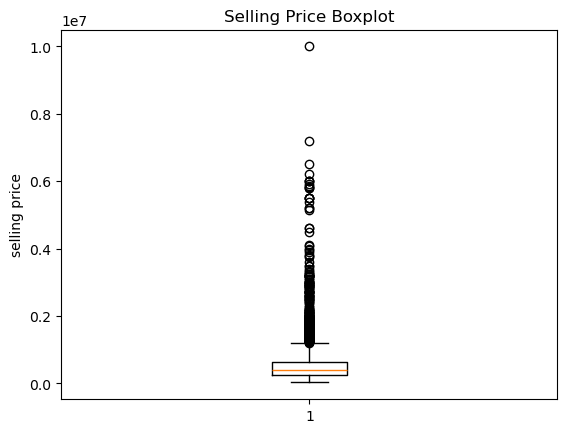

In [17]:
#Check if there are any outliers in the “selling price” column using a boxplot.
import matplotlib.pyplot as plt
plt.boxplot(df['selling_price'])
plt.title("Selling Price Boxplot")
plt.ylabel('selling price')
plt.show()

In [18]:
#Remove cars that are priced below 10,000 or above 5,000,000 (possible outliers)
df = df[(df['selling_price'] >= 10000) & (df['selling_price'] <= 5000000)]
price_limits=df['selling_price'].min(), df['selling_price'].max()
print ("The price limits:",price_limits)

The price limits: (29999, 4600000)


In [19]:
#Standardize the column names so they are all lowercase and contain underscores instead of spaces
# Convert column names to lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6906 entries, 0 to 8124
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6906 non-null   object 
 1   year                6906 non-null   int64  
 2   selling_price       6906 non-null   int64  
 3   km_driven           6906 non-null   int64  
 4   fuel                6906 non-null   object 
 5   seller_type         6906 non-null   object 
 6   transmission        6906 non-null   object 
 7   owner               6906 non-null   object 
 8   mileage(km/ltr/kg)  6906 non-null   float64
 9   engine              6698 non-null   float64
 10  max_power           6701 non-null   object 
 11  seats               6698 non-null   float64
 12  car_age             6906 non-null   int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 755.3+ KB


In [20]:
#Check if any numerical columns are stored as strings and convert them to numbers
#Identify columns with string as data type
string_columns = df.select_dtypes(include='object').columns
#convert to numeric
for col in string_columns:
    df[col] = pd.to_numeric(df[col], errors='ignore') 

print(df.dtypes)

name                   object
year                    int64
selling_price           int64
km_driven               int64
fuel                   object
seller_type            object
transmission           object
owner                  object
mileage(km/ltr/kg)    float64
engine                float64
max_power              object
seats                 float64
car_age                 int64
dtype: object


C:\Users\Admin\AppData\Local\Temp\ipykernel_10872\2489293660.py:6: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


In [21]:
#Create a new column for “price per kilometer” by dividing the selling price by the mileage
df['price_per_km']=df['selling_price']/df['mileage(km/ltr/kg)']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6906 entries, 0 to 8124
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6906 non-null   object 
 1   year                6906 non-null   int64  
 2   selling_price       6906 non-null   int64  
 3   km_driven           6906 non-null   int64  
 4   fuel                6906 non-null   object 
 5   seller_type         6906 non-null   object 
 6   transmission        6906 non-null   object 
 7   owner               6906 non-null   object 
 8   mileage(km/ltr/kg)  6906 non-null   float64
 9   engine              6698 non-null   float64
 10  max_power           6701 non-null   object 
 11  seats               6698 non-null   float64
 12  car_age             6906 non-null   int64  
 13  price_per_km        6906 non-null   float64
dtypes: float64(4), int64(4), object(6)
memory usage: 809.3+ KB


In [22]:
#Ensure the dataset index is properly reset after cleaning.
df.reset_index()

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age,price_per_km
0,0,Ambassador CLASSIC 1500 DSL AC,2000,75000,90000,Diesel,Individual,manual,Second Owner,12.80,1489.0,35.5,5.0,25,5859.375000
1,1,Ambassador Classic 2000 DSZ AC PS,1994,99000,100000,Diesel,Individual,manual,Second Owner,12.80,1995.0,52,5.0,31,7734.375000
2,2,Ambassador Grand 1500 DSZ BSIII,2008,122000,60000,Diesel,Individual,manual,Second Owner,12.80,1995.0,52,5.0,17,9531.250000
3,3,Ambassador Grand 2000 DSZ PW CL,2008,200000,80000,Diesel,Individual,manual,Third Owner,13.50,1995.0,52,5.0,17,14814.814815
4,4,Ashok Leyland Stile LE,2013,300000,200000,Diesel,Individual,manual,Second Owner,20.07,1461.0,75,8.0,12,14947.683109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6901,8062,Volvo S60 D4 SUMMUM,2014,2500000,30000,Diesel,Individual,automatic,First Owner,9.00,1984.0,181,5.0,11,277777.777778
6902,8064,Volvo V40 Cross Country D3,2013,1200000,72500,Diesel,Individual,automatic,Second Owner,23.30,1984.0,150,5.0,12,51502.145923
6903,8065,Volvo V40 D3 R-Design,2018,2475000,2000,Diesel,Dealer,automatic,First Owner,16.80,1984.0,150,5.0,7,147321.428571
6904,8094,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,automatic,First Owner,18.00,1969.0,190,5.0,6,211111.111111


In [23]:
#Save your cleaned dataset as a new CSV file called cleaned_cars.csv.
df.to_csv('cleaned_cars.csv', index=False)

In [24]:
#Find the average selling price of cars in the dataset
mean_selling_price=df['selling_price'].mean()
print("The mean selling price:", mean_selling_price)

The mean selling price: 501378.18114682887


In [25]:
#Find the most common fuel type in the dataset.
most_common_fuel=df['fuel'].mode()
print("The most common fuel:",most_common_fuel)

The most common fuel: 0    Diesel
Name: fuel, dtype: object


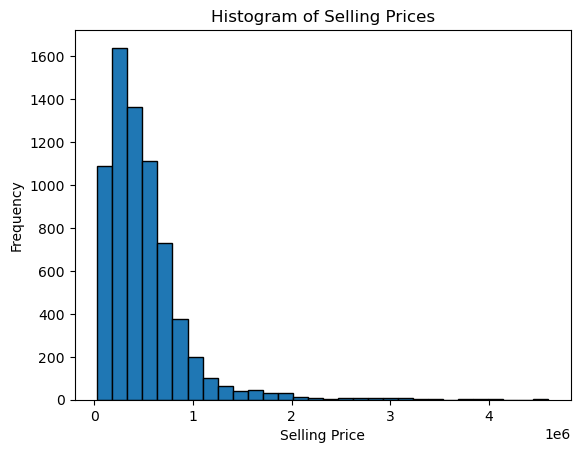

In [26]:
#Plot a histogram of the selling prices
plt.hist(df['selling_price'], bins=30, edgecolor='black')
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.title("Histogram of Selling Prices")
plt.show()

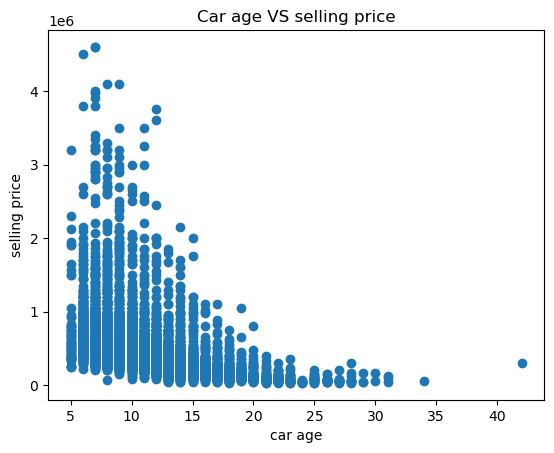

In [27]:
#Plot the relationship between car age and selling price using a scatter plot.
plt.scatter(df['car_age'], df['selling_price'],)
plt.title("Car age VS selling price")
plt.xlabel("car age")
plt.ylabel("selling price")
plt.show()

In [28]:
#Group cars by fuel type and find the average selling price for each group.
grouped = df.groupby("fuel")["selling_price"].agg(["count", "mean"])
print(grouped)

        count           mean
fuel                        
CNG        56  300499.946429
Diesel   3741  620448.482224
LPG        38  200421.052632
Petrol   3071  363717.339629


transmission
manual       6342
automatic     564
Name: count, dtype: int64


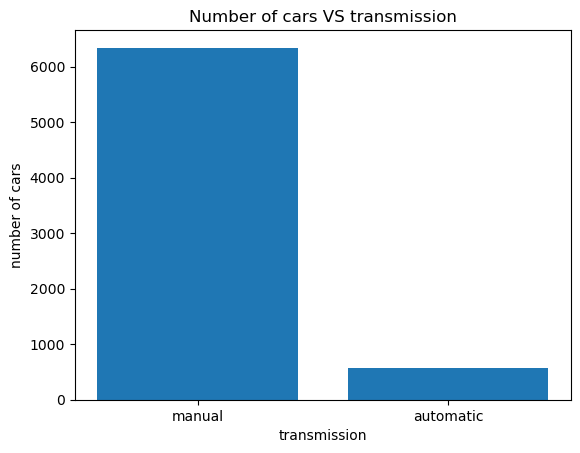

In [29]:
#Plot a bar chart showing the number of cars per transmission type.
#counting the number of cars per transmission type
count_transmission=df['transmission'].value_counts()
print (count_transmission)
#plotting a bar graph
plt.bar(count_transmission.index,count_transmission.values)
plt.title("Number of cars VS transmission")
plt.ylabel("number of cars")
plt.xlabel("transmission")
plt.show()

In [30]:
#Find the car with the highest mileage in the dataset.
highest_mileage= df['mileage(km/ltr/kg)'].idxmax()
car = df.loc[highest_mileage]
print(highest_mileage,car)

3816 name                  Maruti Alto 800 CNG LXI
year                                     2017
selling_price                          260000
km_driven                               67000
fuel                                      CNG
seller_type                        Individual
transmission                           manual
owner                             First Owner
mileage(km/ltr/kg)                      33.44
engine                                  796.0
max_power                                40.3
seats                                     4.0
car_age                                     8
price_per_km                      7775.119617
Name: 3816, dtype: object


In [31]:
#Calculate the correlation between mileage and selling price.
mileages_selling_price_correlation=df['mileage(km/ltr/kg)'].corr(df['selling_price'])
print("Correlation between selling price and mileage:", mileages_selling_price_correlation)
#Meaning high mileage, low selling price

Correlation between selling price and mileage: -0.12069849273188772


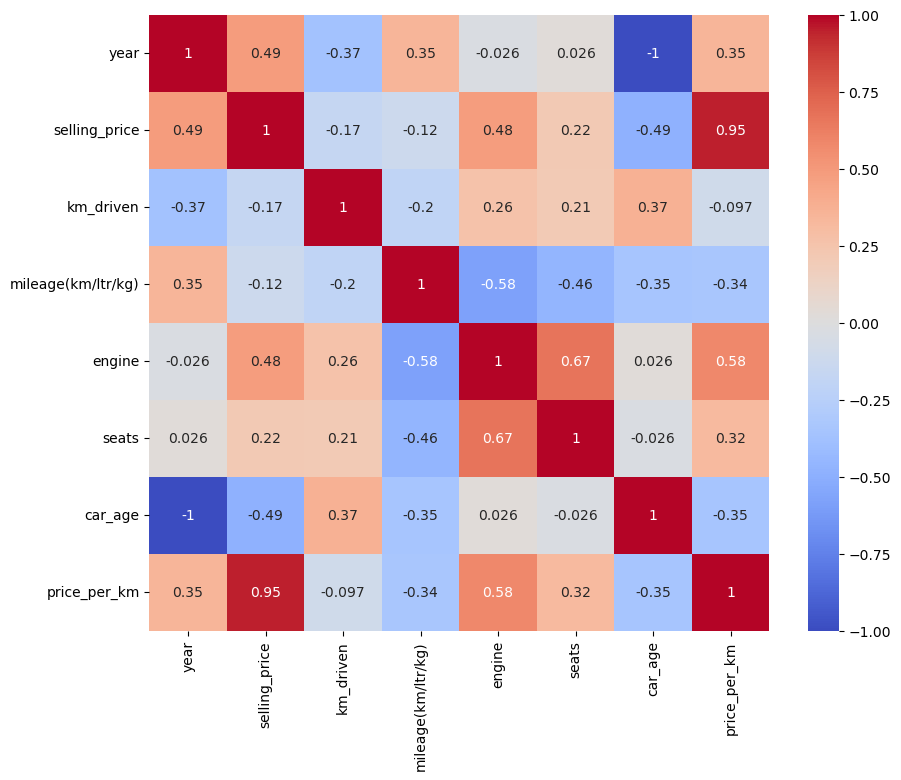

In [32]:
#Plot a heatmap showing the correlations between all numeric columns.
numeric_df = df.select_dtypes(include=['int64', 'float64'])
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(),annot=True, cmap='coolwarm', center=0)
plt.show()

In [34]:
#Check if manual cars are generally cheaper or more expensive than automatic cars 
comparison = df.groupby("transmission")["selling_price"].mean()
print(comparison)

transmission
automatic    1.143215e+06
manual       4.442991e+05
Name: selling_price, dtype: float64


In [ ]:
#Find the average selling price for each year of manufacture.
avg_price_each_year=df.groupby("year")["selling_price"].mean()
avg_price_each_year.head(10)

year
1983    300000.000000
1991     55000.000000
1994     88000.000000
1995    107500.000000
1996     81666.666667
1997     90181.727273
1998     73100.000000
1999     71470.588235
2000     90047.850000
2001     47220.333333
Name: selling_price, dtype: float64

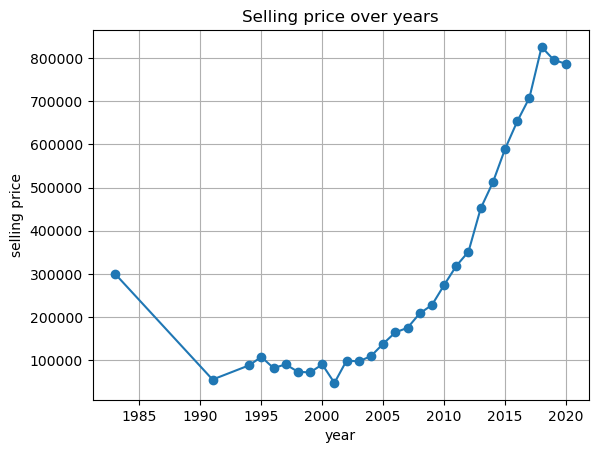

In [ ]:
#Plot a line chart showing the trend of selling prices over the years
plt.plot(avg_price_each_year.index,avg_price_each_year.values, marker='o')
plt.title("Selling price over years")
plt.xlabel("year")
plt.ylabel("selling price")
plt.grid("true")
plt.show()

In [ ]:
#Find the most expensive car for each fuel type.
idx=df.groupby("fuel")["name"].idxmax()
most_expensive_car=df.loc[idx,['fuel','name','selling_price']]
print (most_expensive_car)

        fuel                            name  selling_price
6757     CNG     Tata Indica V2 Emax CNG GLX         155000
8126  Diesel  Volvo XC60 Inscription D5 BSIV        5500000
5950     LPG     Maruti Wagon R LXI LPG BSIV         225000
8127  Petrol   Volvo XC90 T8 Excellence BSIV       10000000


In [ ]:
#Find out which brand appears most frequently in the dataset.
brand=df["name"].value_counts().idxmax()
print(brand)

Maruti Swift Dzire VDI


In [ ]:
#Check the top 5 most common combinations of fuel type and transmission.
top_5=(
    df.groupby(['fuel','transmission'])
    .size()
    .reset_index(name="count")
    .sort_values(by="count", ascending=False)
    .head())
print(top_5)

     fuel transmission  count
2  Diesel       Manual   3868
5  Petrol       Manual   3115
1  Diesel    Automatic    534
4  Petrol    Automatic    516
0     CNG       Manual     57


Any NaNs left? -> 0


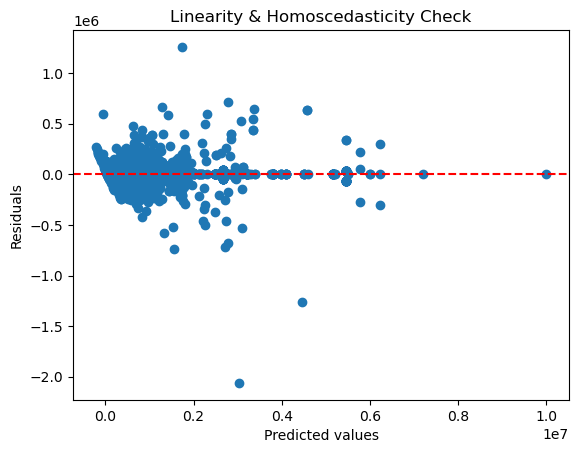

In [ ]:
#main assumptions of linear regression and how to check them on the dataset
#Assuming selling_price is target variable
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
X = df.drop(columns=['selling_price'])
y = df['selling_price']
 
#Convert categorical variables if present
X = pd.get_dummies(X, drop_first=True)
#Handle missing and infinite values
X = X.replace(['np.inf', '-np.inf'],' np.nan')  # Replace inf with NaN
X = X.fillna(X.mean())  # Fill NaN with column means (or you can drop rows)
 
#Double-check
print("Any NaNs left? ->", X.isnull().sum().sum())
#print("Any inf left? ->", np.isinf(X.values).sum())
 
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
#Fit model
model = LinearRegression()
model.fit(X_train, y_train)
 
#Predictions & residuals
y_pred = model.predict(X_train)
residuals = y_train - y_pred
 
# Linearity check → scatter plot of predictions vs residuals
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Linearity & Homoscedasticity Check")
plt.show()

#### Assumptions of multi linear regression
- Relationship between input and output is linear
- The observations are independent
- The residuals have a constant variance-homoscedasticity
- No multicollinearity
- Residuals follows a normal distribution 

In [ ]:
#Train a Linear Regression model to predict the car’s selling price using selected features
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X=df[['mileage(km/ltr/kg)','year','car_age']]
y=df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

model=LinearRegression()
model.fit(X,y)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 8.699286387235462e+18
Coefficients: [-3.53746903e+04 -4.29594389e+15 -4.29594389e+15]


In [ ]:
#Evaluate your Linear Regression model using R² Score and Mean Squared Error (MSE).
y_pred=model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
print("R² Score:", r2)
print("Mean Squared Error:", mse)

R² Score: 0.33211662479227533
Mean Squared Error: 120457192854.58601


In [ ]:
#Apply Lasso Regression on the dataset and compare its performance with Linear Regression.
from sklearn.linear_model import Ridge, Lasso
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

# Compare performance
print("Linear Regression MSE:", mean_squared_error(y_test, lr_pred))
print("Linear Regression R²:", r2_score(y_test, lr_pred))

print("Ridge Regression MSE:", mean_squared_error(y_test, ridge_pred))
print("Ridge Regression R²:", r2_score(y_test, ridge_pred))

print("Lasso Regression MSE:", mean_squared_error(y_test, lasso_pred))
print("Lasso Regression R²:", r2_score(y_test, lasso_pred))

Linear Regression MSE: 130864631277.13242
Linear Regression R²: 0.3440921387531324
Ridge Regression MSE: 130851839205.94028
Ridge Regression R²: 0.344156254014641
Lasso Regression MSE: 130851681529.00497
Lasso Regression R²: 0.34415704430870586


In [ ]:
#Use cross-validation to evaluate your Ridge Regression model.
from sklearn.model_selection import cross_val_score
ridge = Ridge(alpha=1.0)
scores = cross_val_score(ridge, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated MSE:", -scores.mean())

Cross-validated MSE: 124514295628.02774


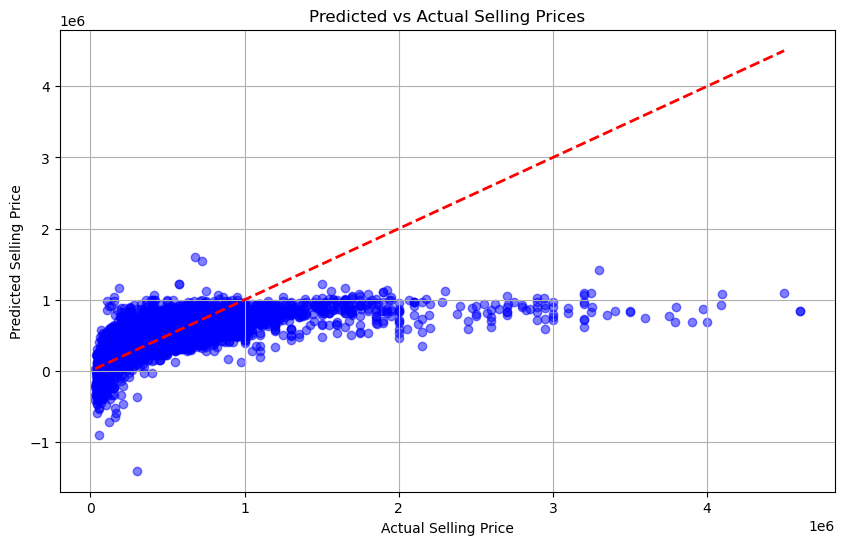

In [ ]:
#Plot the predicted vs actual prices for your best-performing model.
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Predicted vs Actual Selling Prices')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.grid()
plt.show()

In [ ]:
#Use GridSearchCV to find the best alpha value for Ridge Regression.
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best alpha value from GridSearchCV:", grid_search.best_params_)

Best alpha value from GridSearchCV: {'alpha': 10.0}


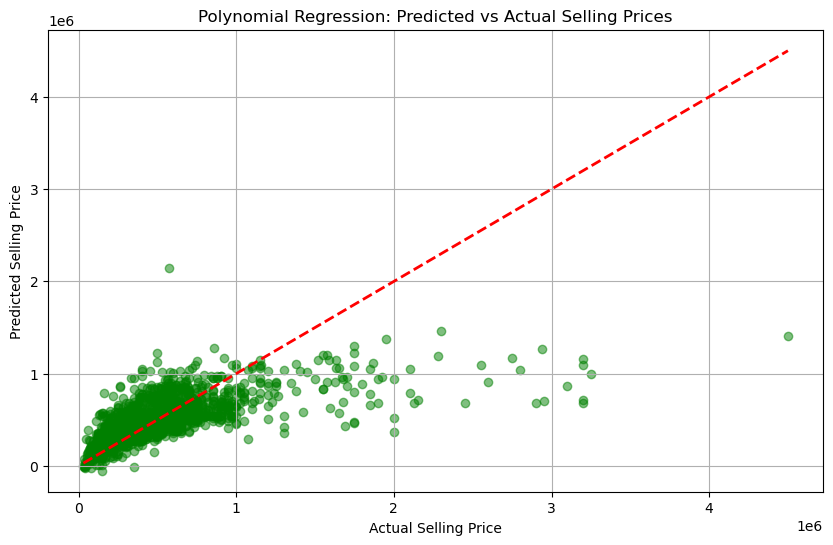

Linear Regression MSE: 130864631277.13242
Polynomial Regression MSE: 117890407744.48987


In [ ]:
#Try Polynomial Regression on the dataset.
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)
y_poly_pred = poly_model.predict(poly.transform(X_test))
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_poly_pred, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.title('Polynomial Regression: Predicted vs Actual Selling Prices')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.grid()
plt.show()
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_lin_pred = lin_reg.predict(X_test)

print("Linear Regression MSE:", mean_squared_error(y_test, y_lin_pred))
print("Polynomial Regression MSE:", mean_squared_error(y_test, y_poly_pred))